# Стратегия взаимодействия с пользователями в фитнес-центре

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
from plotly.graph_objs import *
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

 
import joblib
from joblib import dump

In [45]:
data = pd.read_csv('/datasets/gym_churn.csv')

# EDA

In [46]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null int64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 437.6 KB


In [48]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


In [49]:
grouped_data = data.groupby('Churn', as_index = False).mean()

In [50]:
grouped_data_binary = grouped_data.drop(columns = ['Age', 'Avg_additional_charges_total', 'Contract_period', 
                                                  'Month_to_end_contract', 'Lifetime', 
                                                  'Avg_class_frequency_total', 'Avg_class_frequency_current_month'])

In [51]:
melted_data_binary = grouped_data_binary.melt(id_vars= 'Churn').rename(columns=str.title)

In [52]:
melted_data_binary.head()

,Churn,Variable,Value
0,0,gender,0.510037
1,1,gender,0.510839
2,0,Near_Location,0.873086
3,1,Near_Location,0.768143
4,0,Partner,0.534195


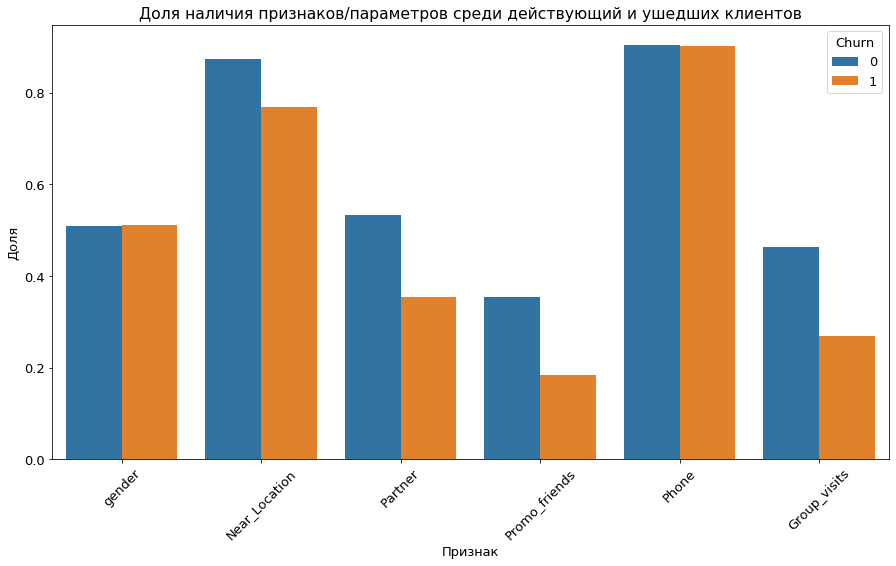

In [53]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Variable', y='Value', hue='Churn', data=melted_data_binary)
plt.title('Доля наличия признаков/параметров среди действующий и ушедших клиентов')
plt.xlabel('Признак')
plt.ylabel('Доля')
plt.xticks(rotation = 45)
plt.show()

#Можно уже по этому графику делать какие-то выводы: меньше уходят, кто ближе живет, в среднем. Также те, кто были приведены в клуб друзьями и берут групповые занятия тоже в срднем уходят меньше.

In [54]:
grouped_data_quality = grouped_data.loc[:,['Churn', 'Contract_period', 
                                                  'Month_to_end_contract', 'Lifetime', 
                                                  'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]

In [55]:
melted_data_quality = grouped_data_quality.melt(id_vars= 'Churn').rename(columns=str.title)

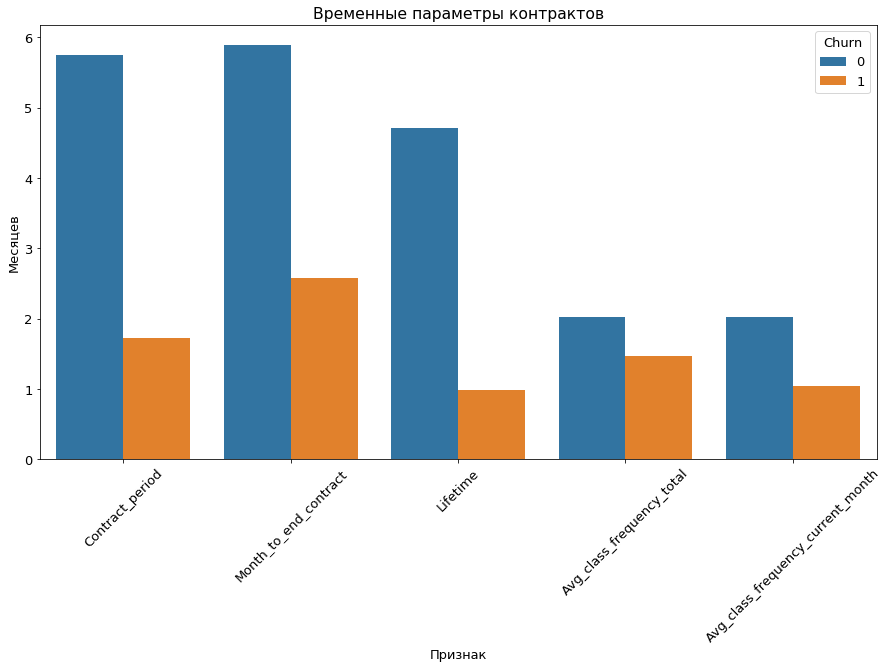

In [56]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Variable', y='Value', hue='Churn', data=melted_data_quality)
plt.title('Временные параметры контрактов')
plt.xlabel('Признак')
plt.ylabel('Месяцев')
plt.xticks(rotation = 45)
plt.show()

#Клиенты, берущие более длительные обонементы в среденем более лояльны. Чем больше срок до окончания, тем меньше клиентов отваливается - простая писхология, клиент, купивший абонемент недавно, больше чувствует его стоиость и поэтому ходит. Кто ходит чаще, тот реже уходит.

In [57]:
grouped_data_age = grouped_data.loc[:,['Churn', 'Age']]

In [58]:
melted_data_age = grouped_data_age.melt(id_vars= 'Churn').rename(columns=str.title)

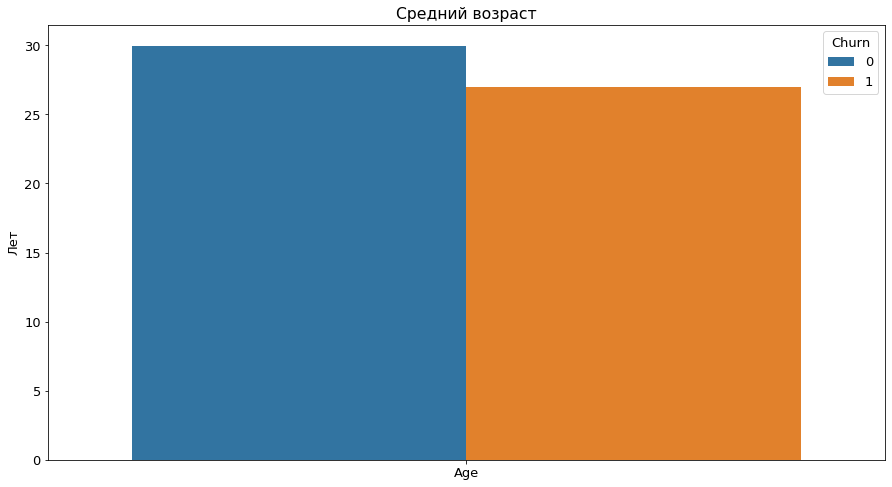

In [59]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Variable', y='Value', hue='Churn', data=melted_data_age)
plt.title('Средний возраст')
plt.xlabel(None)
plt.ylabel('Лет')
plt.show()

#Умозрительно разница по возрастам небольшая - возможно, чуть моложе - в среденем меньше платежеспособность.

In [60]:
grouped_data_charges = grouped_data.loc[:,['Churn', 'Avg_additional_charges_total']]

In [61]:
melted_data_charges = grouped_data_charges.melt(id_vars= 'Churn').rename(columns=str.title)

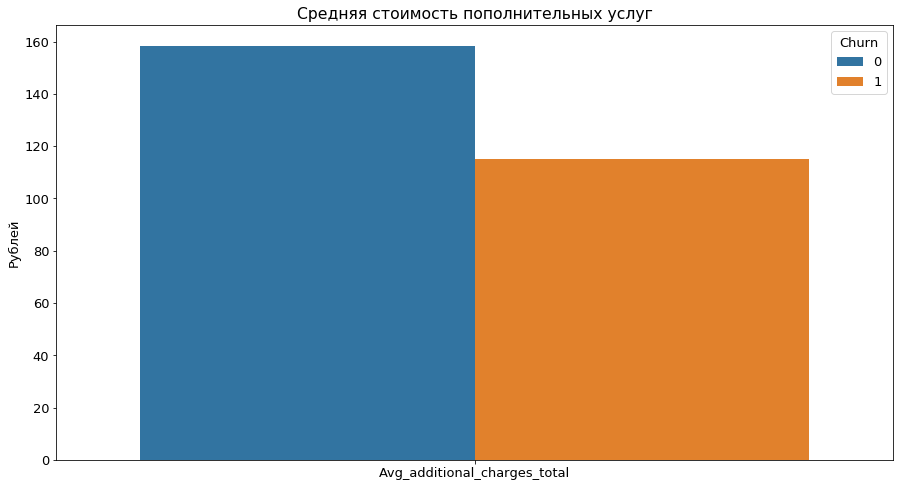

In [62]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Variable', y='Value', hue='Churn', data=melted_data_charges)
plt.title('Средняя стоимость пополнительных услуг')
plt.xlabel(None)
plt.ylabel('Рублей')
plt.show()

#Клиенты, которые оплачивают больше доп услуг - в среденм более лояльны.

In [63]:
data.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.000830,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.140607,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.289094,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.234997,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.959376,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.159569,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.131101,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.114618,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.000830,0.140607,0.289094,0.234997,-0.011196,0.959376,0.159569,0.131101,0.114618,1.000000,0.157723,0.080823,0.142539,-0.374307


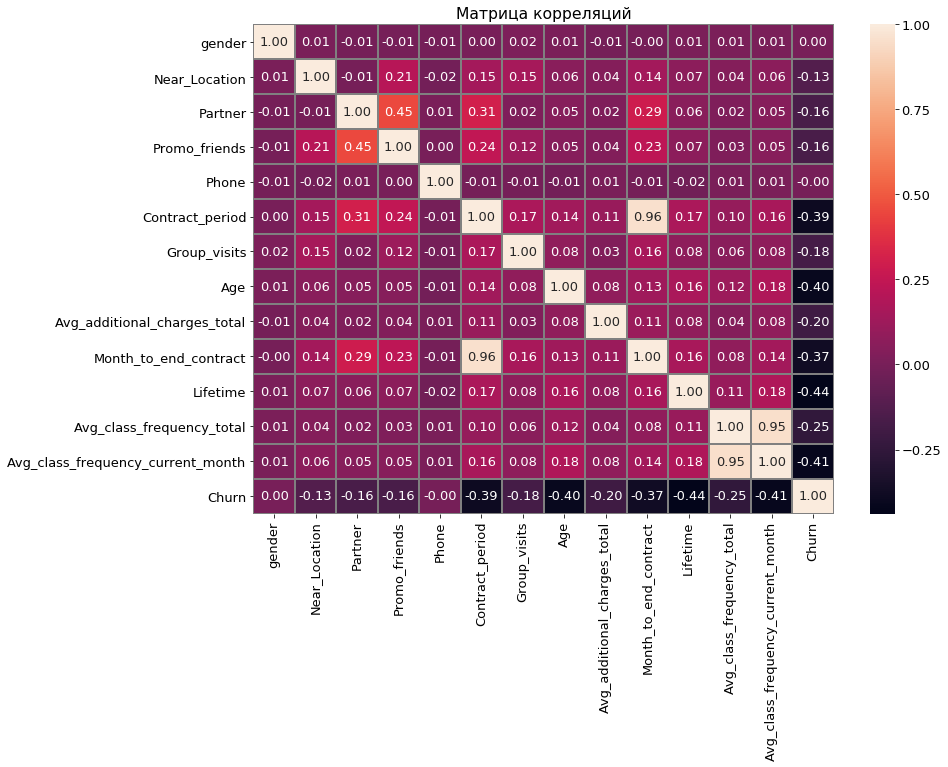

In [64]:
plt.figure(figsize = (13,9))
plt.title('Матрица корреляций')
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.show()

# Модель прогнозирования

In [65]:
df_train, df_valid = train_test_split(data, test_size = 0.25,
                                     random_state = 12345)

In [66]:
train_features = df_train.drop(columns = ['Churn'])
train_target = df_train['Churn']
valid_features = df_valid.drop(columns = ['Churn'])
valid_target = df_valid['Churn']


In [67]:
model_logregression = LogisticRegression(random_state = 12345, solver='lbfgs', max_iter=1000)
model_logregression.fit(train_features, train_target)
valid_predictions_log = model_logregression.predict(valid_features)
accuracy_log = accuracy_score(valid_target, valid_predictions_log)
precision_log = precision_score(valid_target, valid_predictions_log)
recall_log = recall_score(valid_target, valid_predictions_log)
print("Accuracy Логистической регресии {}, precision {:.4f}, recall {:.4f}".format(accuracy_log, precision_log, recall_log))

Accuracy Логистической регресии 0.928, precision 0.8740, recall 0.8473


In [68]:
for j in range(2,26,2):    
    
    model_forest = RandomForestClassifier(n_estimators = j, random_state=12345)
    model_forest.fit(train_features, train_target)
    valid_predictions_forest = model_forest.predict(valid_features)
    accuracy = accuracy_score(valid_target, valid_predictions_forest)
    precision = precision_score(valid_target, valid_predictions_forest)
    recall = recall_score(valid_target, valid_predictions_forest)
    print("Accuracy Случайного леса с n_estimators {}: {}, precision {:.4f}, recall {:.4f}".format(j, accuracy, precision, recall))

Accuracy Случайного леса с n_estimators 2: 0.876, precision 0.8520, recall 0.6374
Accuracy Случайного леса с n_estimators 4: 0.894, precision 0.8545, recall 0.7176
Accuracy Случайного леса с n_estimators 6: 0.896, precision 0.8376, recall 0.7481
Accuracy Случайного леса с n_estimators 8: 0.902, precision 0.8388, recall 0.7748
Accuracy Случайного леса с n_estimators 10: 0.899, precision 0.8340, recall 0.7672
Accuracy Случайного леса с n_estimators 12: 0.91, precision 0.8496, recall 0.7977
Accuracy Случайного леса с n_estimators 14: 0.906, precision 0.8443, recall 0.7863
Accuracy Случайного леса с n_estimators 16: 0.904, precision 0.8458, recall 0.7748
Accuracy Случайного леса с n_estimators 18: 0.912, precision 0.8595, recall 0.7939
Accuracy Случайного леса с n_estimators 20: 0.909, precision 0.8490, recall 0.7939
Accuracy Случайного леса с n_estimators 22: 0.907, precision 0.8506, recall 0.7824
Accuracy Случайного леса с n_estimators 24: 0.905, precision 0.8465, recall 0.7786


#С перебором гипермараметров различные оценки меняют свои значения, но нет такого, где все 3 лучше остальных, компромиссный вариант - 12 деревьев, все метрики достаточно высокие, а Accuracy - самая высокая. В то же время в этой задаче модель логистической регресии  по данным метрикам показывает результаты лучше.

# Кластеризация

In [69]:
scaler = StandardScaler()

In [70]:
features = data.drop(columns = ['Churn'])

In [71]:
features_st = scaler.fit_transform(features)

In [72]:
linked = linkage(features_st, method = 'ward')

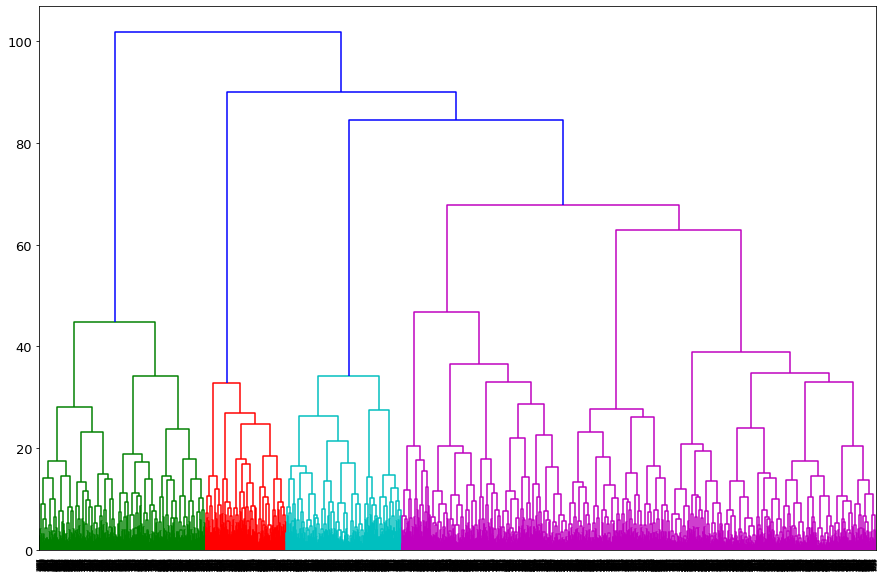

In [73]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('')
plt.show()

#По дендограмме видно выделение 4 кластеров.

#Разбиваем наш выборку клиентов на 4 кластера (оптимально исходя из дендограммы).

In [74]:
km = KMeans(n_clusters = 4)
labels = km.fit_predict(features_st)

#Построенный массив кластеров вставим в нашу исходную таблицу данных.

In [75]:
data['Cluster'] = labels

In [76]:
data_clustered = data.groupby('Cluster', as_index = False).mean()

In [77]:
data_clustered_melted = data_clustered.melt(id_vars= 'Cluster').rename(columns=str.title)

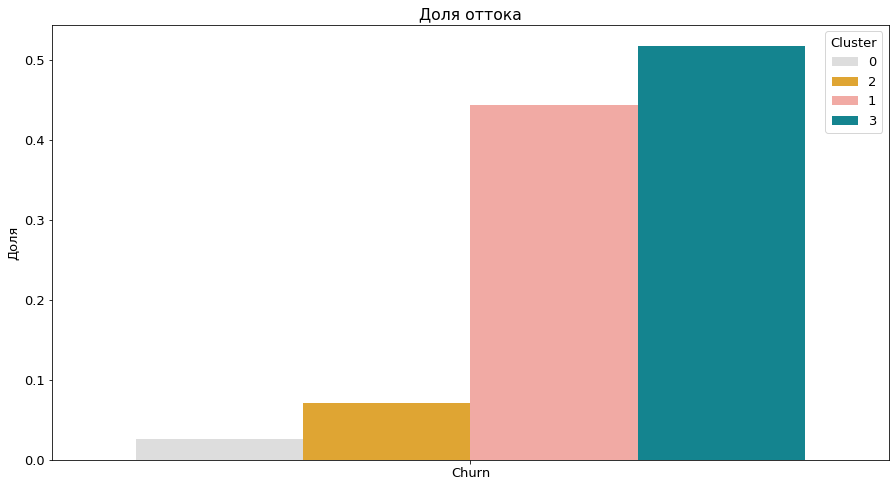

In [78]:
palette ={0:"#dddddd", 1:"#fe9f97", 2: "#fbae17", 3 : "#0095a3"}
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'Variable' , y='Value', hue = 'Cluster', data  
                 = data_clustered_melted.loc[data_clustered_melted.Variable == 'Churn', :],
                hue_order = list(data_clustered_melted.loc[data_clustered_melted.Variable == 'Churn', :]
                                 .sort_values(by = 'Value')['Cluster'],                
                                ), palette = palette
                )
plt.title('Доля оттока')
plt.xlabel(None)
plt.ylabel('Доля')
plt.show()

#Видим, что кластер 2 - наименее лояльные клиенты, отток более 50%.

#Средние значения признаков по кластерам тоже представим для удобства в столбчатых диграммах.

In [79]:
drop_variables = ['Age', 'Avg_additional_charges_total', 'Contract_period', 
                                                  'Month_to_end_contract', 'Lifetime', 
                                                  'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Churn', 'Phone']

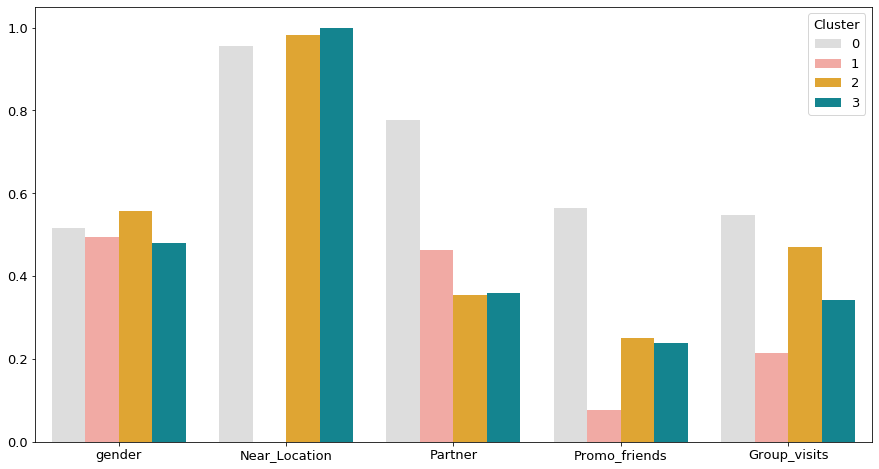

In [80]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'Variable' , y='Value',  hue = 'Cluster', data  
                 = data_clustered_melted.loc[~data_clustered_melted.Variable.isin(drop_variables), :], 
                 palette = palette
        )
plt.title('')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

#По этому графику можно сделать некоторые выводы касаемо устойчикого кластера 3 в среденем эти клиенты имеют более высокую долю среди живужих в ближней локации, среди клиентов, работающих в компании-партнере, в среднем их больше приводили в клуб друзья и они в срднем чаще брали групповые занятия.

In [81]:
data_melted = data.melt(id_vars= 'Cluster').rename(columns=str.title)

In [82]:
terms_variables = ['Contract_period', 'Month_to_end_contract', 'Lifetime', 
                   'Avg_class_frequency_total', 'Avg_class_frequency_current_month']


In [83]:
data_clustered_melt_terms = data_melted.loc[data_melted['Variable'].isin(terms_variables),:]


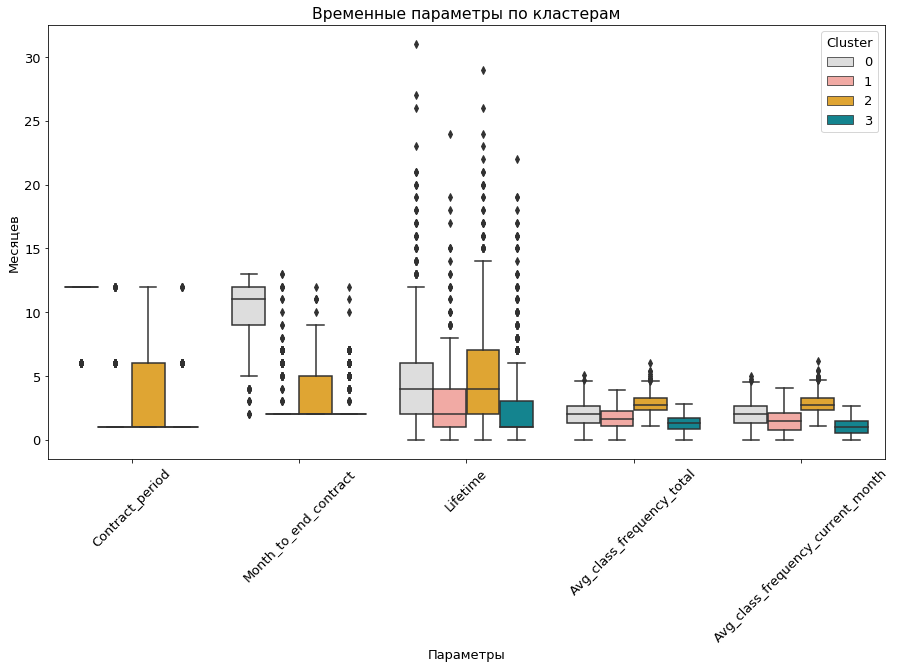

In [84]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.boxplot(x= 'Variable' , y='Value',  hue = 'Cluster', data  
                 = data_clustered_melt_terms, palette = palette)
plt.title('Временные параметры по кластерам')
plt.xlabel('Параметры')
plt.ylabel('Месяцев')
plt.xticks(rotation = 45)
plt.show()

#По большей степени, кластеризация тут не показывает много новой информацмм относительно стодбчатых диграмм, приведенных в начале. Цель выявить кластеры клиентов, понять как сделать так чтобы они не уходили и делать таргетированные предложения в рамках кластера.

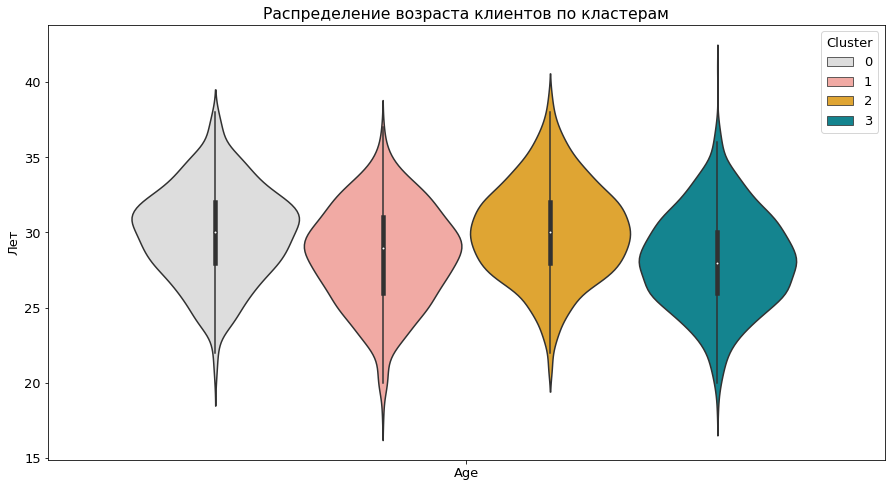

In [85]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.violinplot(x= 'Variable' , y='Value',  hue = 'Cluster', data  
                 = data_melted.loc[data_melted['Variable'] == 'Age',:], palette = palette)
plt.title('Распределение возраста клиентов по кластерам')
plt.xlabel(None)
plt.ylabel('Лет')
plt.show()

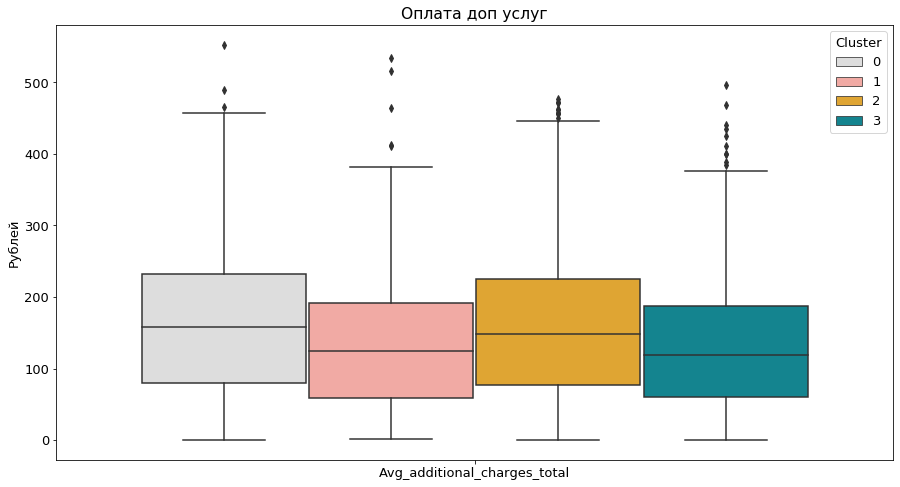

In [86]:
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.boxplot(x= 'Variable' , y='Value',  hue = 'Cluster', data  
                 = data_melted.loc[data_melted['Variable'] == 'Avg_additional_charges_total',:], palette = palette)
plt.title('Оплата доп услуг')
plt.xlabel(None)
plt.ylabel('Рублей')
plt.show()

# Выводы

Суммирую, что уже было написано: 

В среднем меньше уходят, кто ближе живет. Также те, кто были приведены в клуб друзьями и берут групповые занятия тоже в среднем уходят меньше. Это эе видно и в разрезе кластерного анадиза выборки

Клиенты, берущие более длительные обонементы в среденем более лояльны. Чем больше срок до окончания, тем меньше клиентов отваливается - простая писхология, клиент, купивший абонемент, недавно больше чувствует его стоиость и поэтому ходит. Кто ходит чаще, тот реже уходит.

Нам удалось выделить 4 кластера, присвоенные номера от 0 до 3 (номера не значат рейтинг лояльности, присвоены произвольно).
Есть самый устойчивый кластер 3, где в среденем клиенты имеют более высокую долю среди живужих в ближней локации, также среди клиентов в этом кластере самая болшая доля, работающих в компании-партнере, в среднем их больше приводили в клуб друзья и они в среднем чаще брали групповые занятия. Есть кластер 2, где клиенты наименее устоячивы и именно в нем наблюдается наибольший Churn rate. Почти все метрики этого кластера ниже остальных - как качественные, так и количественные. Т.е. в этом кластере наименьшая доля клиентов приглашена друзьями, ближе живущих, длина контракта короче и т.д. 

Кластерный анализ позволил выделить группы клиентов - считаю рациональным обратить внимание отдела маркетинга на кластеры и подготовить таргетированные предложения для снижения оттока клиентов и увеличения выручки.